<h1>视频点击预测<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#背景" data-toc-modified-id="背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>背景</a></span><ul class="toc-item"><li><span><a href="#数据情况" data-toc-modified-id="数据情况-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据情况</a></span></li></ul></li><li><span><a href="#数据集介绍" data-toc-modified-id="数据集介绍-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据集介绍</a></span><ul class="toc-item"><li><span><a href="#app" data-toc-modified-id="app-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>app</a></span></li><li><span><a href="#user" data-toc-modified-id="user-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>user</a></span></li><li><span><a href="#train-&amp;-test" data-toc-modified-id="train-&amp;-test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>train &amp; test</a></span></li></ul></li><li><span><a href="#数据探索分析" data-toc-modified-id="数据探索分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据探索分析</a></span><ul class="toc-item"><li><span><a href="#label分布情况" data-toc-modified-id="label分布情况-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>label分布情况</a></span></li><li><span><a href="#每天的曝光量分布" data-toc-modified-id="每天的曝光量分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>每天的曝光量分布</a></span></li><li><span><a href="#训练集每天的平均点击率分布" data-toc-modified-id="训练集每天的平均点击率分布-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>训练集每天的平均点击率分布</a></span></li><li><span><a href="#训练集每小时平均点击率分布" data-toc-modified-id="训练集每小时平均点击率分布-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>训练集每小时平均点击率分布</a></span></li><li><span><a href="#位置平均点击率分布" data-toc-modified-id="位置平均点击率分布-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>位置平均点击率分布</a></span></li><li><span><a href="#经纬度平均点击率分布" data-toc-modified-id="经纬度平均点击率分布-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>经纬度平均点击率分布</a></span></li><li><span><a href="#各视频推荐到不同位置pos的数量" data-toc-modified-id="各视频推荐到不同位置pos的数量-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>各视频推荐到不同位置pos的数量</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#对曝光时间戳排序" data-toc-modified-id="对曝光时间戳排序-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>对曝光时间戳排序</a></span></li><li><span><a href="#时间划分" data-toc-modified-id="时间划分-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>时间划分</a></span></li><li><span><a href="#与user表拼接" data-toc-modified-id="与user表拼接-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>与user表拼接</a></span></li></ul></li><li><span><a href="#特征工程" data-toc-modified-id="特征工程-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>特征工程</a></span><ul class="toc-item"><li><span><a href="#构造交叉特征" data-toc-modified-id="构造交叉特征-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>构造交叉特征</a></span></li><li><span><a href="#下一次曝光特征（穿越）" data-toc-modified-id="下一次曝光特征（穿越）-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>下一次曝光特征（穿越）</a></span></li><li><span><a href="#历史曝光时间特征" data-toc-modified-id="历史曝光时间特征-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>历史曝光时间特征</a></span></li><li><span><a href="#前后曝光时间特征" data-toc-modified-id="前后曝光时间特征-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>前后曝光时间特征</a></span></li></ul></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#模型结果可视化" data-toc-modified-id="模型结果可视化-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>模型结果可视化</a></span></li><li><span><a href="#总结" data-toc-modified-id="总结-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>总结</a></span></li></ul></div>

# 背景


随着移动互联网的快速发展，海量数据也从网络上产生，视频数据便是其中的一种数据类型。如何从海量视频数据中精准地选择用户喜欢的类型，并推荐给用户，成为当下的一大难题。本次任务便是以用户的视频行为数据为基础，构建推荐模型， 为移动用户在合适的时间、合适的地点精准推荐用户感兴趣的内容，提高用户在推荐视频上的点击行为。


## 数据情况
训练集总共给出了从2019.11.08 ~ 2019.11.10三天的数据，需要预测2019.11.11用户的点击行为，涉及到以下三种数据集:
app安装列表、
user基础画像、
train&test数据集

In [1]:
import pandas as pd 
import numpy as np 
import re
import os 
import time
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import f1_score,classification_report
import gc
import xgboost as xgb
from scipy import stats
import datetime
from scipy.stats import entropy ,kurtosis
import multiprocessing
from gensim.models.word2vec import LineSentence
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
tqdm.pandas()
from sklearn.metrics import f1_score, roc_auc_score
import catboost as cbt
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ASUS\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
datapath = 'F:/直播项目演示/data/'

# 数据集介绍

## app

app.csv包含631条数据，2个字段：deviceid，applist    


<table>
    <tr>
      <th style='width:100px'>字段</th>
      <th style='width:100px'>中文名</th>
      <th style='width:100px'>数据类型</th>
      <th style='width:100px'>说明</th>
    </tr>
     <tr>
      <th>deviceid</th>
      <th>设备id</th>
      <th>string</th>
      <th>用户设备id</th>
    </tr>
     <tr>
      <th>applist</th>
      <th>用户所拥有的app列表</th>
      <th>string</th>
      <th>用户所拥有的app，我们已将app的名字设置成了app_1,app_2..的形式</th>
    </tr>    
</table>


In [3]:
app = pd.read_csv(datapath + 'app_split.csv')

In [4]:
app.head()

,deviceid,applist
0,31ca069a7c5a05d44e1496bbdcfab0ee,[app_133 ]
1,f9bc1e3247bc1f7af05d871977f44b0c,[app_133 ]
2,00774ac88b60658dab9abb8e88a7f7a0,[app_133 ]
3,0ab378cfb2a5ddd3b2f18828b25eeace,[app_5 app_86 app_4 app_8 app_88 app_97 app_96...
4,3eeab1ff0d4f9651adfe12e01bba2eca,[app_133 ]


In [5]:
applist = []
for x in app['applist']:
    temp = [int(s) for s in re.findall('\d+\.?\d*', x)]
    applist = list(set(applist + temp))

In [6]:
print(applist[0:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## user

user.csv包含128573条数据，9个字段：deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender 


<table>
    <tr>
      <th style='width:100px'>字段</th>
      <th style='width:100px'>中文名</th>
      <th style='width:100px'>数据类型</th>
      <th style='width:100px'>说明</th>
    </tr>
     <tr>
      <th>deviceid</th>
      <th>设备id</th>
      <th>string</th>
      <th>用户设备id</th>
    </tr>
     <tr>
      <th>guid</th>
      <th>用户注册id</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>outertag</th>
      <th>用户画像</th>
      <th>string</th>
      <th>用|分隔，冒号后面的数字代表对该标签的符合程度，分数越高代表该标签越符合该用户</th>
    </tr>
     <tr>
      <th>tag</th>
      <th>用户画像</th>
      <th>string</th>
      <th>同outertag</th>
    </tr> 
     <tr>
      <th>level</th>
      <th>用户等级</th>
      <th>string</th>
      <th></th>
    </tr>
     <tr>
      <th>personidentification</th>
      <th>是否劣质用户</th>
      <th>string</th>
      <th>1表示劣质用户 0表示正常用户。</th>
    </tr>
     <tr>
      <th>followscore</th>
      <th>徒弟分（好友分）</th>
      <th>string</th>
      <th></th>
    </tr>
     <tr>
      <th>personalscore</th>
      <th>个人分</th>
      <th>string</th>
      <th></th>
    </tr>  
     <tr>
      <th>gender</th>
      <th>性别</th>
      <th>string</th>
      <th></th>
    </tr>      
</table>


In [7]:
user = pd.read_csv(datapath + 'user_split.csv')

In [8]:
user.head()

,deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender
0,bc7b555b7f9f42db8227375537aceba2,002cc2b2a9e9f54520484f5995188d2b,NaN,NaN,1.0,0.0,10.0,10.0,NaN
1,1c868b5a1a293ff3bc9db024b42c19c3,023bba55bebe780537e57cf05c6d4a4a,片段_cs:0.4174125852307531|花絮片段_cs:0.29932103835...,跆拳道_cs:7.879971506901009|钓鱼_cs:5.4827626154767...,1.0,0.0,10.0,19.5,0.0
2,33fd3e44ddb813d318738e006c521fde,1ffbf8455f2eef18d317fd10e4e0a7ef,NaN,NaN,1.0,0.0,10.0,7.5,1.0
3,575c7bc6ba73a6da9f50bd1098d28b51,NaN,NaN,老虎_cs:54.30925671036804|美女_cs:5.5503764860383855,NaN,NaN,NaN,NaN,NaN
4,1466bfa8c16f0a0971d233e1a06cef0a,c9237ea3cf1197feb5b745d5977d7fa2,NaN,NaN,1.0,0.0,14.5,26.5,2.0


In [9]:
# user.columns

## train & test

train.csv包含115575条数据，15个字段：id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts 




<table>
    <tr>
      <th style='width:100px'>字段</th>
      <th style='width:100px'>中文名</th>
      <th style='width:100px'>数据类型</th>
      <th style='width:100px'>说明</th>
    </tr>
     <tr>
      <th>id</th>
      <th>用户id</th>
      <th>string</th>
      <th></th>
    </tr>
     <tr>
      <th>target</th>
      <th>是否点击</th>
      <th>int</th>
      <th>代表该视频是否被用户点击了，1代表点击，0代表未点击，test数据集中无该字段</th>
    </tr>    
     <tr>
      <th>timestamp</th>
      <th>点击时间戳</th>
      <th>string</th>
      <th>代表改用户点击改视频的时间戳，如果未点击则为NULL，test数据集中无该字段</th>
    </tr>
     <tr>
      <th>deviceid</th>
      <th>用户设备id</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>newsid</th>
      <th>视频的id</th>
      <th>int</th>
      <th></th>
    </tr>
     <tr>
      <th>guid</th>
      <th>用户的注册id</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>pos</th>
      <th>视频推荐位置</th>
      <th>int</th>
      <th></th>
    </tr>
     <tr>
      <th>app_version</th>
      <th>app版本</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>device_vendor</th>
      <th>设备厂商</th>
      <th>string</th>
      <th></th>
    </tr>
     <tr>
      <th>netmodel</th>
      <th>网络类型</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>osversion</th>
      <th>操作系统版本</th>
      <th>string</th>
      <th></th>
    </tr> 
     <tr>
      <th>lng</th>
      <th>经度</th>
      <th>int</th>
      <th></th>
    </tr>
     <tr>
      <th>lat</th>
      <th>维度</th>
      <th>int</th>
      <th></th>
    </tr>     
     <tr>
      <th>device_version</th>
      <th>设备版本</th>
      <th>string</th>
      <th></th>
    </tr>
     <tr>
      <th>ts</th>
      <th>视频曝光给用户的时间戳</th>
      <th>int</th>
      <th></th>
    </tr>      
    
</table>


In [10]:
train = pd.read_csv(datapath + 'train_split.csv')
test = pd.read_csv(datapath +  'test_split.csv')

In [11]:
train.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts
0,669,0,NaN,c3e32bb121962bdade805f21e1bfc187,564141971056577691,763aabb7c93ad7b38d9e6bdbaaab9615,1,2.1.5,vivo,w,9,86.180164,41.717127,V1901A,1573380478460
1,670,0,NaN,c3e32bb121962bdade805f21e1bfc187,6287946510509531879,763aabb7c93ad7b38d9e6bdbaaab9615,0,2.1.5,vivo,o,9,86.184246,41.743467,V1901A,1573380479985
2,671,0,NaN,c3e32bb121962bdade805f21e1bfc187,7389658295673860810,763aabb7c93ad7b38d9e6bdbaaab9615,3,2.1.5,vivo,w,9,86.184076,41.743499,V1901A,1573361117669
3,760334,0,NaN,c3e32bb121962bdade805f21e1bfc187,6339090406062929366,763aabb7c93ad7b38d9e6bdbaaab9615,0,2.1.5,vivo,w,9,86.184076,41.743498,V1901A,1573361225126
4,760335,0,NaN,c3e32bb121962bdade805f21e1bfc187,6738701256636918283,763aabb7c93ad7b38d9e6bdbaaab9615,0,2.1.5,vivo,w,9,86.184076,41.743499,V1901A,1573361106981


In [12]:
data = pd.concat((train,test))

In [13]:
train['target'].value_counts()

0    103741
1     11834
Name: target, dtype: int64

# 数据探索分析

## label分布情况

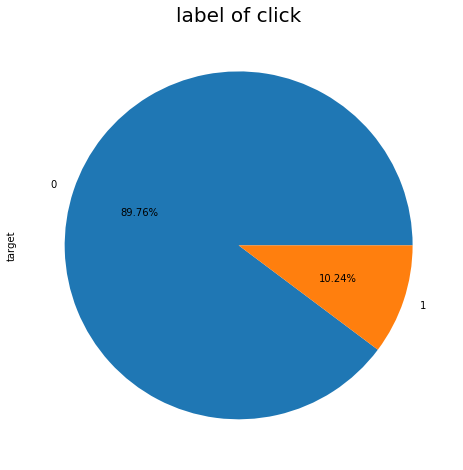

In [14]:
fig,axes = plt.subplots(figsize=(16,8))
train['target'].value_counts().plot(kind='pie',ax=axes,autopct='%1.2f%%')
axes.set_aspect('equal') # 设置饼图的纵横比相等
axes.set_title('label of click',size=20)
plt.show()

## 每天的曝光量分布

In [15]:
t = time.time()
data['date'] = pd.to_datetime(
    data['ts'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x/ 1000)))
)
data['day'] = data['date'].dt.day
data.loc[data['day'] == 7, 'day'] = 8
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data_num = data.shape[0]
labels = data['target'].values
print('runtime:', time.time() - t)

runtime: 1.077077865600586


In [16]:
data['day'].value_counts().sort_index()

8     40935
9     37376
10    37264
11    41509
Name: day, dtype: int64

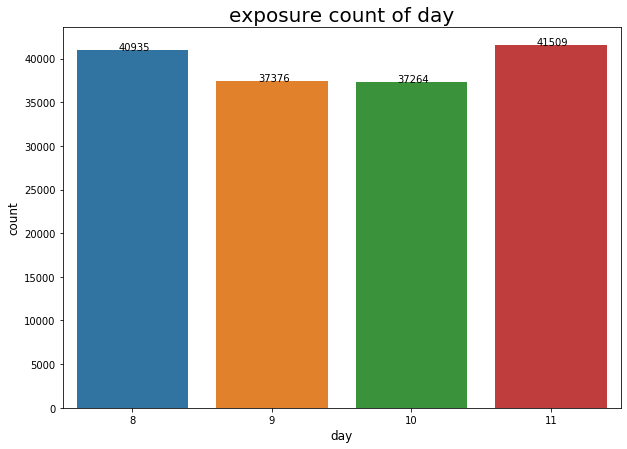

In [17]:
fig,axes = plt.subplots(figsize=(10,7))
ax = sns.barplot(data['day'].value_counts().sort_index().index,data['day'].value_counts().sort_index())

for p, label in zip(ax.patches,data['day'].value_counts().sort_index()):
        t = plt.text(p.get_x()+0.3, p.get_height()+0.3,label) ;    
plt.title('exposure count of day',size=20)
plt.xlabel('day',size=12)
plt.ylabel('count',size=12)
plt.grid(False)
plt.show()

## 训练集每天的平均点击率分布

In [18]:
t = time.time()
train['date'] = pd.to_datetime(
    train['ts'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime((x / 1000)))
                      ))
train['day'] = train['date'].dt.day
train.loc[train['day'] == 7, 'day'] = 8
train['hour'] = train['date'].dt.hour
train['minute'] = train['date'].dt.minute
train_num = train.shape[0]
labels = train['target'].values
print('runtime:', time.time() - t)

runtime: 0.7839040756225586


In [19]:
train['day'].value_counts() 

8     40935
9     37376
10    37264
Name: day, dtype: int64

In [20]:
click = train[train['target'] == 1].sort_values('timestamp').reset_index(drop=True)
click['exposure_click_gap'] = click['timestamp'] - click['ts']
click = click[click['exposure_click_gap'] >= 0].reset_index(drop=True)
click['date'] = pd.to_datetime(
    click['timestamp'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x / 1000)))
)
click['day'] = click['date'].dt.day
click.loc[click['day'] == 7, 'day'] = 8
# del train['target'], train['timestamp']
# for f in ['date', 'exposure_click_gap', 'timestamp', 'ts', 'target', 'hour', 'minute']:
#     del click[f]
print('runtime:', time.time() - t)

runtime: 0.911562442779541


In [21]:
click['day'].value_counts() 

10    4473
9     3771
8     3469
Name: day, dtype: int64

In [22]:
# click['day'].value_counts()/train['day'].value_counts()

In [23]:
click_rate = train.groupby('day')['target'].mean()
click_rate

day
8     0.085868
9     0.102445
10    0.120492
Name: target, dtype: float64

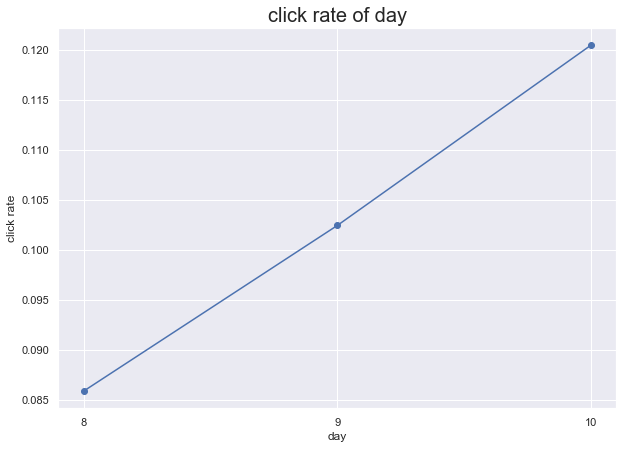

In [24]:
sns.set(style="darkgrid")
fig,axes = plt.subplots(figsize=(10,7))
index = ['8','9','10']
plt.plot(index,click_rate,marker='o')
plt.title('click rate of day',size=20)
plt.xlabel('day',size=12)
plt.ylabel('click rate',size=12)
plt.grid(True)
plt.show()

## 训练集每小时平均点击率分布

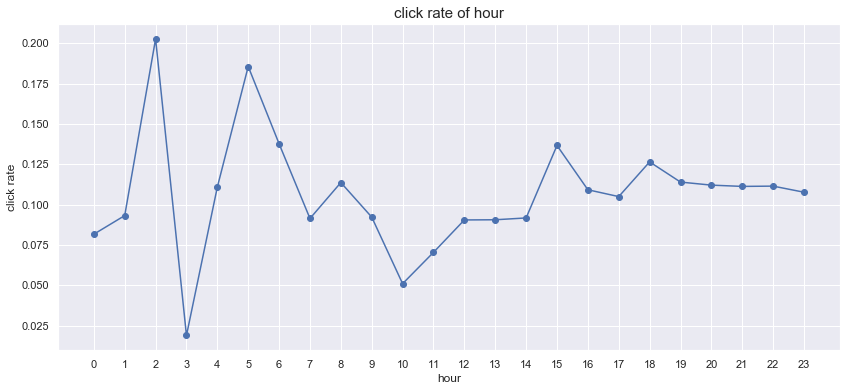

In [25]:
plt.figure(figsize=(14,6))
plt.plot(train.groupby('hour')['target'].mean(),marker='o');
plt.xticks(train.groupby('hour')['target'].mean().index);
plt.xlabel('hour')
plt.ylabel('click rate')
plt.title('click rate of hour',fontsize=15);
plt.show()

## 位置平均点击率分布

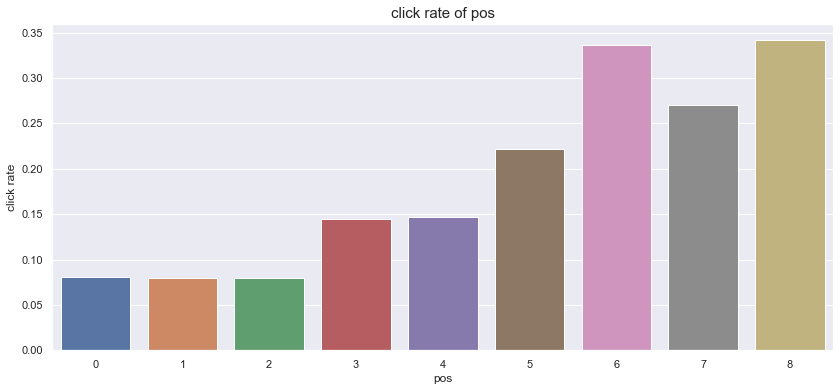

In [26]:
plt.figure(figsize=(14,6))
sns.barplot(train.groupby('pos')['target'].mean().index,train.groupby('pos')['target'].mean(),);
plt.xticks(train.groupby('pos')['target'].mean().index);
plt.xlabel('pos')
plt.ylabel('click rate')
plt.title('click rate of pos',fontsize=15);

## 经纬度平均点击率分布

In [27]:
train['lng_lat'] = train['lng'].astype('str') + "_" + train['lat'].astype('str')

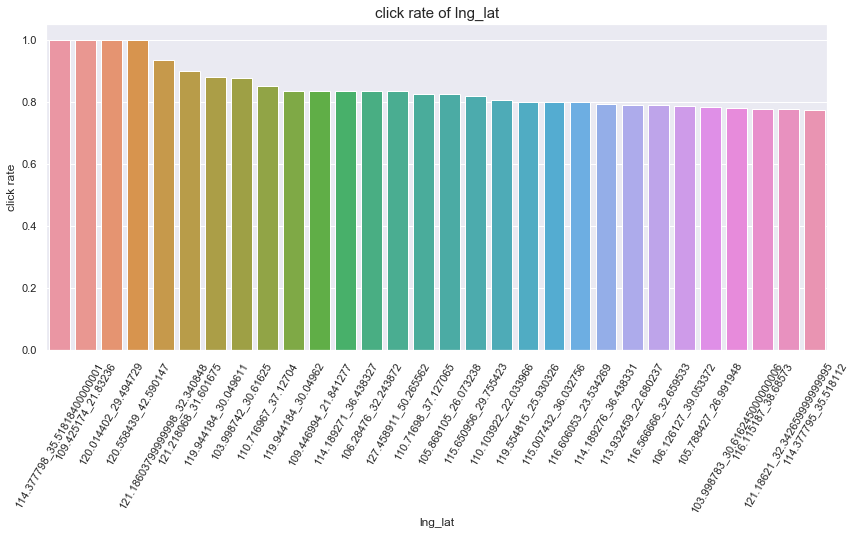

In [28]:
plt.figure(figsize=(14,6))
temp = train.groupby('lng_lat')['target'].mean().sort_values(ascending=False)
sns.barplot(temp.index[0:30],temp[0:30]);
plt.xticks(rotation=60);
plt.xlabel('lng_lat')
plt.ylabel('click rate')
plt.title('click rate of lng_lat',fontsize=15);

## 各视频推荐到不同位置pos的数量

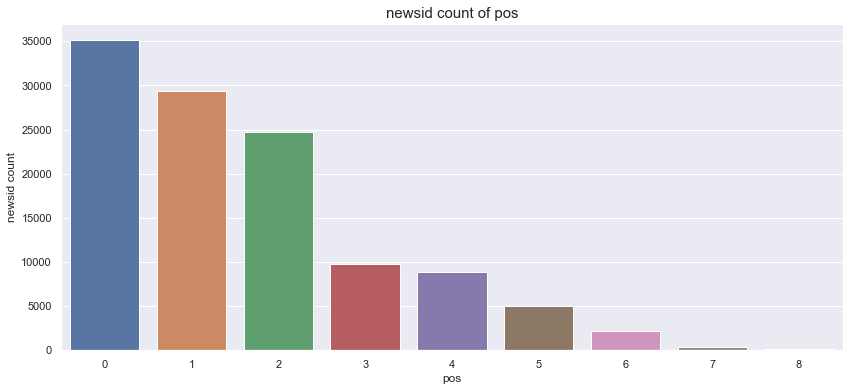

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(train.groupby('pos')['newsid'].count().index,train.groupby('pos')['newsid'].count(),);
plt.xticks(train.groupby('pos')['newsid'].count().index);
plt.xlabel('pos')
plt.ylabel('newsid count')
plt.title('newsid count of pos',fontsize=15);

# 数据预处理

## 对曝光时间戳排序


In [30]:
data = data.sort_values(['deviceid','ts']).reset_index().drop('index',axis=1)

In [31]:
data['newsid'] = data['newsid'].astype('str')
data.describe()

,target,timestamp,pos,lng,lat,ts,day,hour,minute
count,115575.000000,1.183400e+04,157084.000000,157084.000000,157084.000000,1.570840e+05,157084.000000,157084.000000,157084.000000
mean,0.102392,1.573288e+12,1.591741,99.126066,27.881045,1.573324e+12,9.505125,13.710868,29.477789
std,0.303165,7.594696e+07,1.578764,36.801232,11.844297,1.008598e+08,1.140027,5.900156,17.804702
min,0.000000,1.573143e+12,0.000000,0.000000,-33.839781,1.573142e+12,8.000000,0.000000,0.000000
25%,0.000000,1.573219e+12,0.000000,106.091952,24.978454,1.573224e+12,8.000000,9.000000,14.000000
50%,0.000000,1.573290e+12,1.000000,110.716945,29.755376,1.573316e+12,10.000000,14.000000,29.000000
75%,0.000000,1.573365e+12,2.000000,116.742025,36.797464,1.573424e+12,11.000000,19.000000,45.000000
max,1.000000,1.573402e+12,8.000000,133.043025,53.485312,1.573488e+12,11.000000,23.000000,59.000000


## 时间划分

In [32]:
data['ts_datetime'] =data['ts'] + 8*60*60*1000
data['ts_datetime'] = pd.to_datetime(data['ts_datetime'],unit='ms')
data['day'] = data['ts_datetime'].dt.day
data['hour'] = data['ts_datetime'].dt.hour
data['minute'] = data['ts_datetime'].dt.minute
data['minute10'] = (data['minute']//10)*10
#累计小时数
data['hourl'] = data['day'] * 24 + data['hour']
data['hourl'] = data['hourl']-data['hourl'].min()
data.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,...,lat,device_version,ts,date,day,hour,minute,ts_datetime,minute10,hourl
0,814684,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,1664777331430763089,abc52babe444b270d24b57a3da2f2730,1,2.1.5,xiaomi,w,...,37.1502,Redmi 5 Plus,1573159603891,2019-11-08 04:46:43,8,4,46,2019-11-08 04:46:43.891,40,4
1,9154117,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,507332634239897426,abc52babe444b270d24b57a3da2f2730,2,2.1.5,xiaomi,w,...,37.1502,Redmi 5 Plus,1573159603938,2019-11-08 04:46:43,8,4,46,2019-11-08 04:46:43.938,40,4
2,6876829,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,6768984367129441959,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,o,...,37.1502,Redmi 5 Plus,1573159604147,2019-11-08 04:46:44,8,4,46,2019-11-08 04:46:44.147,40,4
3,6876835,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8702196972423189172,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,37.1502,Redmi 5 Plus,1573159604148,2019-11-08 04:46:44,8,4,46,2019-11-08 04:46:44.148,40,4
4,6876832,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8366293543547191379,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,37.1502,Redmi 5 Plus,1573159605212,2019-11-08 04:46:45,8,4,46,2019-11-08 04:46:45.212,40,4


## 与user表拼接

In [33]:
data = data.merge(
    user[['deviceid', 'level', 'outertag', 'tag', 'personidentification',
       'followscore', 'personalscore', 'gender']], how='left', on=['deviceid'])

In [34]:
user.count()

deviceid                128573
guid                     84448
outertag                 30268
tag                      63158
level                    82654
personidentification     79644
followscore              80526
personalscore            82654
gender                   55560
dtype: int64

In [35]:
df_tag = user[['deviceid', 'tag']].copy()

node_pairs = []
for item in tqdm(user[['deviceid', 'tag']].values):
    deviceid = str(item[0])
    tags = item[1]

    if type(tags) != float:
        tags = tags.split('|')
        for tag in tags:
            try:
                key, value = tag.split(':')
            except Exception:
                pass
            node_pairs.append([deviceid, key, value])

df_tag = pd.DataFrame(node_pairs)
df_tag.columns = ['deviceid', 'tag', 'score']
df_tag['score'] = df_tag['score'].astype('float')

df_temp = df_tag.groupby(['deviceid'])['score'].agg([('tag_score_mean', 'mean'),
                                                     ('tag_score_std', 'std'),
                                                     ('tag_score_count', 'count'),
                                                     ('tag_score_q2', lambda x: np.quantile(x, q=0.5)),
                                                     ('tag_score_q3', lambda x: np.quantile(x, q=0.75))]
                                                     ).reset_index()

data = data.merge(df_temp, how='left')

del df_temp
del df_tag

gc.collect()

100%|███████████████████████████████████████████████████████████████████████| 128573/128573 [00:06<00:00, 19550.63it/s]


0

In [36]:
data.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,...,tag,personidentification,followscore,personalscore,gender,tag_score_mean,tag_score_std,tag_score_count,tag_score_q2,tag_score_q3
0,814684,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,1664777331430763089,abc52babe444b270d24b57a3da2f2730,1,2.1.5,xiaomi,w,...,可爱_cs:31.37695010342603|明星_cs:2.3277290338212073,0.0,10.0,3.0,NaN,16.85234,20.540901,2.0,16.85234,24.114645
1,9154117,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,507332634239897426,abc52babe444b270d24b57a3da2f2730,2,2.1.5,xiaomi,w,...,可爱_cs:31.37695010342603|明星_cs:2.3277290338212073,0.0,10.0,3.0,NaN,16.85234,20.540901,2.0,16.85234,24.114645
2,6876829,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,6768984367129441959,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,o,...,可爱_cs:31.37695010342603|明星_cs:2.3277290338212073,0.0,10.0,3.0,NaN,16.85234,20.540901,2.0,16.85234,24.114645
3,6876835,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8702196972423189172,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,可爱_cs:31.37695010342603|明星_cs:2.3277290338212073,0.0,10.0,3.0,NaN,16.85234,20.540901,2.0,16.85234,24.114645
4,6876832,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8366293543547191379,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,可爱_cs:31.37695010342603|明星_cs:2.3277290338212073,0.0,10.0,3.0,NaN,16.85234,20.540901,2.0,16.85234,24.114645


# 特征工程

## 构造交叉特征

In [37]:
#用户反应时间特征
data['exposure_click_gap'] = data['timestamp'] - click['ts']

#设备厂商与性别
data['devicevendor_gender'] = data['device_vendor'].astype(
    'str') + '_' + data['gender'].astype('str')

#系统版本与性别
data['osversion_gender'] = data['osversion'].astype(
    'str') + '_' + data['gender'].astype('str')

# 设备厂商与系统版本
data['devicevendor_osv'] = data['device_vendor'].astype(
    'str') + '_' + data['osversion'].astype('str')

# 位置与网络类型
data['pos_netmodel'] = data['pos'].astype('str')+'_'+data['netmodel'].astype('str')

#设备与视频
data['deviceid_newsid'] = data['deviceid'].astype('str') + "_" + data['newsid'].astype('str')

#经纬度与视频
data['lnglat_newsid'] = data['lng'].astype('str') + data['lat'].astype('str')+ "_" + data['newsid'].astype('str')

In [38]:
data.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,...,tag_score_count,tag_score_q2,tag_score_q3,exposure_click_gap,devicevendor_gender,osversion_gender,devicevendor_osv,pos_netmodel,deviceid_newsid,lnglat_newsid
0,814684,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,1664777331430763089,abc52babe444b270d24b57a3da2f2730,1,2.1.5,xiaomi,w,...,2.0,16.85234,24.114645,NaN,xiaomi_nan,8.1.0_nan,xiaomi_8.1.0,1_w,00774ac88b60658dab9abb8e88a7f7a0_1664777331430...,112.96002737.1502_1664777331430763089
1,9154117,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,507332634239897426,abc52babe444b270d24b57a3da2f2730,2,2.1.5,xiaomi,w,...,2.0,16.85234,24.114645,NaN,xiaomi_nan,8.1.0_nan,xiaomi_8.1.0,2_w,00774ac88b60658dab9abb8e88a7f7a0_5073326342398...,112.96002737.1502_507332634239897426
2,6876829,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,6768984367129441959,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,o,...,2.0,16.85234,24.114645,NaN,xiaomi_nan,8.1.0_nan,xiaomi_8.1.0,0_o,00774ac88b60658dab9abb8e88a7f7a0_6768984367129...,112.96002737.1502_6768984367129441959
3,6876835,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8702196972423189172,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,2.0,16.85234,24.114645,NaN,xiaomi_nan,8.1.0_nan,xiaomi_8.1.0,0_w,00774ac88b60658dab9abb8e88a7f7a0_8702196972423...,112.96002737.1502_8702196972423189172
4,6876832,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8366293543547191379,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,2.0,16.85234,24.114645,NaN,xiaomi_nan,8.1.0_nan,xiaomi_8.1.0,0_w,00774ac88b60658dab9abb8e88a7f7a0_8366293543547...,112.96002737.1502_8366293543547191379


## 下一次曝光特征（穿越）

In [39]:
# 曝光位置变化
data['before_pos'] = data.groupby(['deviceid'])['pos'].shift(1)
data['next_pos'] = data.groupby(['deviceid'])['pos'].shift(-1)
data['diff_pos'] = data['next_pos'] - data['pos']

# 曝光距离变化 (lat2-lat1)**2 + (lng2-lng1) ** 2
data['next_lat'] = data.groupby(['deviceid'])['lat'].shift(-1)
data['next_lng'] = data.groupby(['deviceid'])['lng'].shift(-1)
data['dist_diff'] = (data['next_lat'] - data['lat']
                           ) ** 2 + (data['lng'] - data['next_lng']) ** 2

del data['next_lat']
del data['next_lng']

# 下一次曝光网络
data['next_netmodel'] = data.groupby(['deviceid'])[
    'netmodel'].shift(-1)

## 历史曝光时间特征

In [40]:
#每个位置历史平均点击率
col = 'next_pos'
df_temp = data.groupby([col, 'day'], as_index=False)['target'].agg({
    'yesterday_{}_click_count'.format(col): 'sum',
    'yesterday_{}_count'.format(col): 'count',
})
df_temp['yesterday_{}_ctr'.format(col)] = df_temp['yesterday_{}_click_count'.format(col)] \
    / df_temp['yesterday_{}_count'.format(col)]

df_temp['day'] += 1

del df_temp['yesterday_{}_count'.format(col)]
del df_temp['yesterday_{}_click_count'.format(col)]

data = data.merge(df_temp, on=[col, 'day'], how='left')

del df_temp
g = gc.collect()


## 前后曝光时间特征

In [41]:
def cal_ts_feature(sort_df,cols,gaps,prev=True):
    '''
    计算前后x次曝光的时间差
    sort_df: 按ts排序好的数据集
    cols:按cols进分组统计
    gaps:需要统计的次数
    prev:True 统计曝光前 False 统计曝光后
    '''
    result = pd.DataFrame()
    tmp = sort_df.groupby(cols)
    # 前x次曝光到当前的时间差
    for gap in tqdm(gaps):
        if prev:
            sort_df['{}_prev{}_exposure_ts_gap'.format(
                '_'.join(cols), gap)] = tmp['ts'].shift(0) - tmp['ts'].shift(gap)
            tmp2 = sort_df[
                cols + ['ts', '{}_prev{}_exposure_ts_gap'.format('_'.join(cols), gap)]
            ].drop_duplicates(cols + ['ts']).reset_index(drop=True)
        else:
            sort_df['{}_next{}_exposure_ts_gap'.format(
                '_'.join(cols), gap)] = tmp['ts'].shift(-gap) - tmp['ts'].shift(0)
            tmp2 = sort_df[
                cols + ['ts', '{}_next{}_exposure_ts_gap'.format('_'.join(cols), gap)]
            ].drop_duplicates(cols + ['ts']).reset_index(drop=True)
        if len(result) ==0:
            result = tmp2
        else:
            result = result.merge(tmp2, on=cols + ['ts'], how='left')
    return result

In [42]:
data['lng_lat'] = data['lng'].astype('str') + '_' + data['lat'].astype('str')
sort_df = data.sort_values('ts').reset_index(drop=True)
# 前x次曝光到当前的时间差
res1 = cal_ts_feature(sort_df,cols = ['deviceid'],gaps = [2, 3, 4, 5, 8, 10, 20, 30])
res2 = cal_ts_feature(sort_df,cols = ['deviceid','netmodel'],gaps = [2, 3])
# 后x次曝光到当前的时间差
res3 = cal_ts_feature(sort_df,cols = ['deviceid'],gaps = [2, 3, 4, 5, 8, 10, 20, 30, 50],prev=False)
res4 = cal_ts_feature(sort_df,cols = ['deviceid','pos'],gaps = [1,2],prev=False)
res5 = cal_ts_feature(sort_df,cols = ['deviceid','netmodel'],gaps = [1,2],prev=False)
res6 = cal_ts_feature(sort_df,cols = ['deviceid','pos', 'netmodel',],gaps = [1],prev=False)
res7 = cal_ts_feature(sort_df,cols = ['deviceid', 'lng_lat'],gaps = [1,2],prev=False)
res8 = cal_ts_feature(sort_df,cols = ['deviceid', 'pos','lng_lat'],gaps = [1],prev=False)

data=data.merge(res1,on=['deviceid','ts'],how='left')
data=data.merge(res2,on=['deviceid','netmodel','ts'],how='left')
data=data.merge(res3,on=['deviceid','ts'],how='left')
data=data.merge(res4,on=['deviceid','pos','ts'],how='left')
data=data.merge(res5,on=['deviceid','netmodel','ts'],how='left')
data=data.merge(res6,on=['deviceid','pos', 'netmodel','ts'],how='left')
data=data.merge(res7,on=['deviceid','lng_lat','ts'],how='left')
data=data.merge(res8,on=['deviceid','pos','lng_lat','ts'],how='left')

del res1,res2,res3,res4,res5,res6,res7,res8
data.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.86it/s]


,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,...,deviceid_next30_exposure_ts_gap,deviceid_next50_exposure_ts_gap,deviceid_pos_next1_exposure_ts_gap,deviceid_pos_next2_exposure_ts_gap,deviceid_netmodel_next1_exposure_ts_gap,deviceid_netmodel_next2_exposure_ts_gap,deviceid_pos_netmodel_next1_exposure_ts_gap,deviceid_lng_lat_next1_exposure_ts_gap,deviceid_lng_lat_next2_exposure_ts_gap,deviceid_pos_lng_lat_next1_exposure_ts_gap
0,814684,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,1664777331430763089,abc52babe444b270d24b57a3da2f2730,1,2.1.5,xiaomi,w,...,15299820.0,53138403.0,1340.0,270034.0,47.0,257.0,1340.0,47.0,256.0,1340.0
1,9154117,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,507332634239897426,abc52babe444b270d24b57a3da2f2730,2,2.1.5,xiaomi,w,...,15304873.0,53139991.0,1315.0,5242823.0,210.0,1274.0,1315.0,209.0,210.0,1315.0
2,6876829,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,6768984367129441959,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,o,...,15304675.0,53153675.0,1.0,1065.0,1799.0,269908.0,1799.0,1.0,1065.0,1.0
3,6876835,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8702196972423189172,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,15305067.0,53247598.0,1064.0,1798.0,1064.0,1083.0,1064.0,1064.0,1083.0,1064.0
4,6876832,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8366293543547191379,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,15304780.0,53328194.0,734.0,268708.0,19.0,41.0,268708.0,19.0,41.0,734.0


In [43]:
#前几次的曝光位置
for gap in tqdm([2, 3, 4, 5, 6, 7]):
    data['next_pos{}'.format(gap)] = data.groupby(
        ['deviceid'])['pos'].shift(-gap)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.64it/s]


In [44]:
# data.to_pickle(os.path.join( 'feature', 'feature_v2.pickle'))

In [45]:
data.head()

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,...,deviceid_pos_netmodel_next1_exposure_ts_gap,deviceid_lng_lat_next1_exposure_ts_gap,deviceid_lng_lat_next2_exposure_ts_gap,deviceid_pos_lng_lat_next1_exposure_ts_gap,next_pos2,next_pos3,next_pos4,next_pos5,next_pos6,next_pos7
0,814684,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,1664777331430763089,abc52babe444b270d24b57a3da2f2730,1,2.1.5,xiaomi,w,...,1340.0,47.0,256.0,1340.0,0.0,0.0,0.0,1.0,2.0,0.0
1,9154117,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,507332634239897426,abc52babe444b270d24b57a3da2f2730,2,2.1.5,xiaomi,w,...,1315.0,209.0,210.0,1315.0,0.0,0.0,1.0,2.0,0.0,0.0
2,6876829,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,6768984367129441959,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,o,...,1799.0,1.0,1065.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0
3,6876835,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8702196972423189172,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,1064.0,1064.0,1083.0,1064.0,1.0,2.0,0.0,0.0,1.0,0.0
4,6876832,0.0,NaN,00774ac88b60658dab9abb8e88a7f7a0,8366293543547191379,abc52babe444b270d24b57a3da2f2730,0,2.1.5,xiaomi,w,...,268708.0,19.0,41.0,734.0,2.0,0.0,0.0,1.0,0.0,1.0


# 训练模型

In [46]:
#对特征进行编码
for f in tqdm(list(data.columns[data.dtypes=='object'])):
    if f not in ['id']:
        le = LabelEncoder()
        data[f] = le.fit_transform(
            data[f].astype('str')).astype('int')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 10.78it/s]


In [47]:
test = data[data['target'].isnull()].copy()
train = data[data['target'].notnull()].copy()

del data
gc.collect()

109

In [48]:
seed = 2021
n_fold = 5

In [49]:
ycol = 'target'
feature_names = list(
    filter(lambda x: x not in [ycol, 'timestamp',"deviceid",'guid','date', 'ts', 'id', 'day', 'hour', 'minute', 'ts_datetime', 'minute10',
                               'personidentification', 'level', 'followscore', 'personalscore', 'gender',
                               'hourl', 'group','newsid','lng','lat','tag_score_std'],
           train.columns))

model = lgb.LGBMClassifier(num_leaves=64,
                           max_depth=3,
                           learning_rate=0.3,
                           n_estimators=1000,
                           subsample=0.8,
#                            feature_fraction=0.8,
                           reg_alpha=0.5,
                           reg_lambda=0.5,
#                            verbose=1,
#                            silent=False,
                           random_state=seed,
                           metric='auc'
                           )
oof = []
prediction = test[['id']]
prediction['target'] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=n_fold, shuffle=False, random_state=seed)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(train[feature_names], train['day'])):
    X_train = train.iloc[trn_idx][feature_names]
    Y_train = train.iloc[trn_idx][ycol]

    X_val = train.iloc[val_idx][feature_names]
    Y_val = train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(fold_id+1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=200,
                          eval_metric='auc',
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict_proba(
        X_val, num_iteration=lgb_model.best_iteration_)[:, 1]
    df_oof = train.iloc[val_idx][['id', ycol]].copy()
    df_oof['pred'] = pred_val
    oof.append(df_oof)
    
    
    pred_test = lgb_model.predict_proba(
        test[feature_names], num_iteration=lgb_model.best_iteration_)[:, 1]
    prediction['target'] += pred_test / n_fold

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()


Fold_1 Training ================================

Training until validation scores don't improve for 50 rounds
[200]	train's auc: 0.984541	valid's auc: 0.956603
Early stopping, best iteration is:
[161]	train's auc: 0.9829	valid's auc: 0.956777

Fold_2 Training ================================

Training until validation scores don't improve for 50 rounds
[200]	train's auc: 0.983098	valid's auc: 0.96688
Early stopping, best iteration is:
[155]	train's auc: 0.980867	valid's auc: 0.967898

Fold_3 Training ================================

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[86]	train's auc: 0.978347	valid's auc: 0.969681

Fold_4 Training ================================

Training until validation scores don't improve for 50 rounds
[200]	train's auc: 0.986039	valid's auc: 0.966447
Early stopping, best iteration is:
[271]	train's auc: 0.988595	valid's auc: 0.966957

Fold_5 Training ================================

Training until 

In [50]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg(
    'mean').sort_values(ascending=False).reset_index()
df_importance

,column,importance
0,deviceid_next10_exposure_ts_gap,43.0
1,deviceid_next20_exposure_ts_gap,42.2
2,deviceid_next8_exposure_ts_gap,41.4
3,deviceid_newsid,38.4
4,deviceid_netmodel_next2_exposure_ts_gap,37.6
5,deviceid_next50_exposure_ts_gap,37.0
6,deviceid_next30_exposure_ts_gap,36.4
7,netmodel,35.0
8,deviceid_next3_exposure_ts_gap,33.8
9,deviceid_next5_exposure_ts_gap,30.2


In [51]:
df_oof = pd.concat(oof)
df_oof['pred_bin'] = df_oof['pred'].rank()
df_oof['pred_bin'] = (df_oof['pred_bin'] >= df_oof.shape[0]
                      * 0.8834642948637943).astype(int)

auc = roc_auc_score(df_oof['target'],df_oof['pred'])
f1 = f1_score(df_oof['target'], df_oof['pred_bin'])
print('f1',f1)
print('auc:', auc)

f1 0.7574955681730596
auc: 0.9652145333695883


# 模型结果可视化

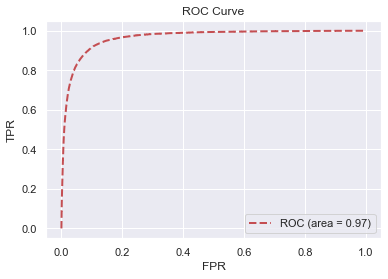

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
fpr, tpr, thersholds = roc_curve(df_oof['target']+1, df_oof['pred'], pos_label=2)
   
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'r--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim()  
plt.ylim()
plt.xlabel('FPR')
plt.ylabel('TPR')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 总结

In [53]:
# 由于时间关系，没有做参数调优、没有尝试其他模型、特征工程